-------------

##  <font color='blue'> Table Of Contents </font>
- ### <font color='blue'> Problem Statement </font>   
- ### <font color='blue'> Importing necessary libraries and reading the dataset </font>
- ### <font color='blue'> Exploratory Data Analysis</font>
- ### <font color='blue'> Data Preparation for Model Building</font>
- ### <font color='blue'> Model Building and Evaluation</font>

### <font color = 'green'> **Problem-Statement**



<p>Airbnb Inc is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. Airbnb has close to 150 million customers across the world. Price is the most important factor considered by the customer while making booking into a property. Strategic pricing of the properties is important to avoid losing customers to the competitors.</p>
<p>We have a data of 74111 Airbnb properties across the nations. Based on this data build multiple linear regression model to predict the strategic pricing of a new listed property on Airbnb.</p>


</p>Business Task</p>
</p>Analyze Airbnb data for New York City and identify trends between pricing, neighborhoods, and listings.</p>




#### <font color = 'green'> **Attribute Information.**

- **id** - Property ID
- **room_type** - Type of Room in the property.
- **accommodates** - How many adults can this property accomodates.
- **bathrooms** - Number of bathrooms in the property.
- **cancellation_policy** - Cancellation policy of the property.
- **cleaning_fee** - This denotes whether propoerty cleaning fee is included in the rent or not.
- **instant_bookable** - It indicates whether instant booking facility is available or not.
- **review_scores_rating** - Review rating score of the property.
- **bedrooms** - Number of bedrooms in the property.
- **beds** - Total number of beds in the property.
- **log_price** - Log of rental price of the property for a fixed period.


### <font color = 'green'> **Import necessary libraries and read the dataset.**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [5]:
df= pd.read_csv("D:/dataset/AB_NYC_2019.csv")


### <font color = 'green'> **Exploratory Data Analysis**


<font size=3> Perform Necessary Exploratory Data Analysis.

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,07-05-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [7]:
df['price'].mean()

152.7206871868289

In [8]:
df.shape

(48895, 16)

In [9]:
df.drop=df.drop(columns=['id','host_id','last_review'],inplace=True)

In [10]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_name                       48874 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

### <font color = 'green'> **Data Preparation for model buidling.**

<font size=3> Q. Check for duplicate records and drop them.

In [12]:
df.duplicated().sum()

0

<font size=3> Q. Check for missing values and handle them with appropriate methods.

In [13]:
df.isnull().sum()

name                                 16
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Check some datas which were null in  reviews_per_month, and in some of them, the number_of_reviews was 0. So it's obvious that when number_of_reviews was 0 this column will be zero. therefore I will put zero on null column.

In [14]:
df.loc[df.number_of_reviews==0, 'reviews_per_month'] = 0

Without name and host_name data will be useless so remove them

In [15]:
df = df[pd.notnull(df['name'])]
df = df[pd.notnull(df['host_name'])]

In [16]:
df.isnull().sum() #recheck the number of cell null 

name                              0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [17]:
categorical= df.select_dtypes(object).columns.to_list()
continuous= df.select_dtypes([int,float]).columns.to_list()
print("categorical: ", categorical)
print("continuous: ", continuous)

categorical:  ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']
continuous:  ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


<font size=3> Q. Check for the presence of outliers and treat them with appropriate techniques.

check for the outliers

In [18]:
df[continuous].sort_values(by=['latitude'])

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
14119,40.49979,-74.24084,110,2,0,0.00,1,364
46919,40.50641,-74.23059,75,1,1,1.00,1,299
15278,40.50708,-74.24285,100,2,0,0.00,1,365
1424,40.50868,-74.23986,299,3,59,0.82,1,245
23460,40.50873,-74.23914,85,2,49,2.08,2,159
...,...,...,...,...,...,...,...,...
3349,40.90804,-73.90005,53,2,143,2.13,1,263
48033,40.91167,-73.89566,40,1,1,1.00,3,174
23011,40.91169,-73.90564,50,365,0,0.00,1,363
47790,40.91234,-73.89417,40,1,1,1.00,3,179


latitude column have very near value so columns doesn't have any outlier values 

In [19]:
df[continuous].sort_values(by=['longitude'])

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
45652,40.50943,-74.24442,70,3,1,1.00,1,128
15278,40.50708,-74.24285,100,2,0,0.00,1,365
14119,40.49979,-74.24084,110,2,0,0.00,1,364
1424,40.50868,-74.23986,299,3,59,0.82,1,245
23460,40.50873,-74.23914,85,2,49,2.08,2,159
...,...,...,...,...,...,...,...,...
38562,40.76212,-73.71928,32,3,1,0.14,1,88
45592,40.74027,-73.71829,180,2,0,0.00,2,281
11610,40.72756,-73.71795,42,3,0,0.00,1,0
47208,40.74006,-73.71690,240,2,0,0.00,2,159


longitude variables isn't have any outlier

In [20]:
df[continuous].sort_values(by=['price'])

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
26866,40.69166,-73.90928,0,30,5,0.26,6,139
25796,40.68258,-73.91284,0,1,95,4.35,6,222
25794,40.68173,-73.91342,0,1,93,4.28,6,176
26259,40.75091,-73.97597,0,3,0,0.00,1,0
26841,40.69211,-73.90670,0,30,2,0.11,6,333
...,...,...,...,...,...,...,...,...
12342,40.71355,-73.98507,9999,99,6,0.14,1,83
6530,40.79264,-73.93898,9999,5,1,0.02,1,0
9151,40.76810,-73.91651,10000,100,2,0.04,1,0
29238,40.77213,-73.98665,10000,30,0,0.00,1,83


data shoes big interval in it may be price column have outliers so draw a plot for price column 

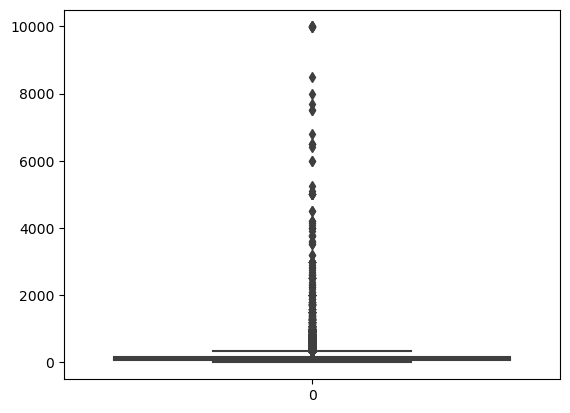

In [21]:
sns.boxplot(df.price)
plt.show()

So here more than 2000. its will be outliers. now, check how much datas more than 2000.

In [22]:
len(df[df.price > 2000])

86

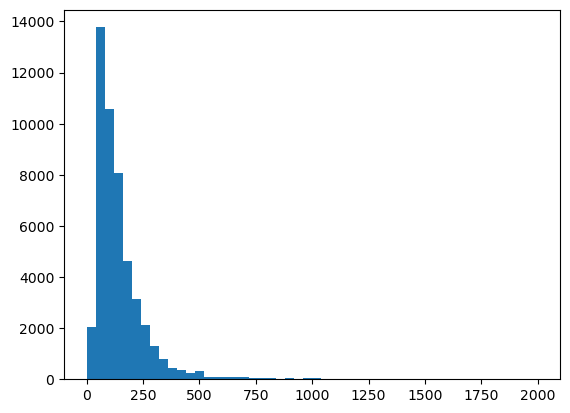

In [23]:
df= df[df.price < 2000]
plt.hist(df.price, bins=50)
plt.show()

In [24]:
len(df[df.price > 1000])

129

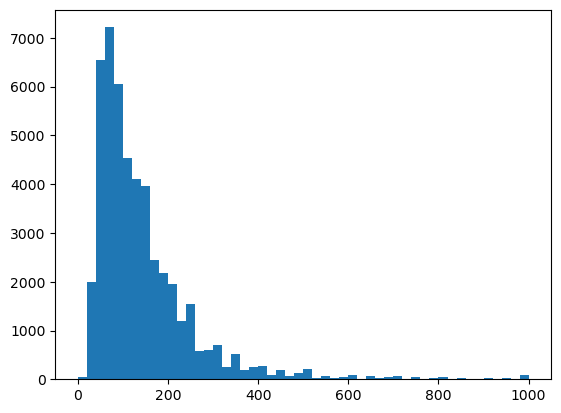

In [25]:
df = df[df.price <= 1000]
plt.hist(df.price, bins=50)
plt.show()

Now we can see we have compact data in price

In [26]:
df[continuous].sort_values(by=['minimum_nights'])

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
11752,40.77012,-73.95777,200,1,0,0.00,1,0
32281,40.72469,-73.97892,165,1,67,5.51,1,38
11755,40.68523,-73.92926,49,1,136,3.05,3,200
11757,40.77942,-73.97627,180,1,43,0.98,1,0
...,...,...,...,...,...,...,...,...
47620,40.70898,-73.94885,140,500,0,0.00,1,331
13404,40.82915,-73.94034,99,999,2,0.07,1,42
26341,40.71772,-73.95059,79,999,24,1.12,6,249
38664,40.73094,-73.99900,110,999,0,0.00,1,365


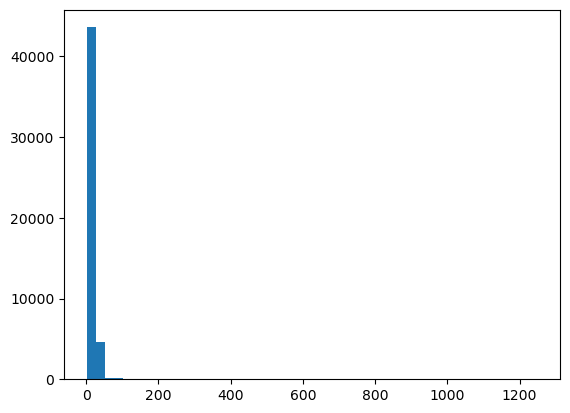

In [27]:
plt.hist(df.minimum_nights, bins=50)
plt.show()

In [28]:
len(df[df.minimum_nights > 200])

65

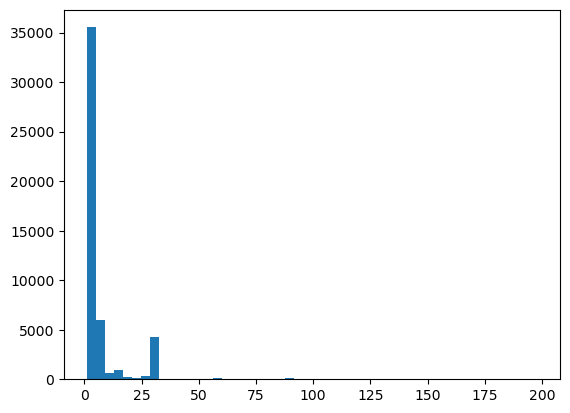

In [29]:
df= df[df.minimum_nights < 200]
plt.hist(df.minimum_nights, bins=50)
plt.show()

In [30]:
df[continuous].sort_values(by=['number_of_reviews'])

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48894,40.76404,-73.98933,90,7,0,0.00,1,23
40761,40.71991,-73.98505,110,30,0,0.00,1,172
40760,40.82121,-73.87764,65,7,0,0.00,1,90
40758,40.82636,-73.94985,95,2,0,0.00,1,0
13619,40.73440,-74.00262,105,1,0,0.00,1,0
...,...,...,...,...,...,...,...,...
13495,40.66939,-73.76975,47,1,576,13.40,2,173
2015,40.82264,-73.94041,49,1,594,7.57,3,339
2030,40.82124,-73.93838,49,1,597,7.72,3,342
2031,40.82085,-73.94025,49,1,607,7.75,3,293


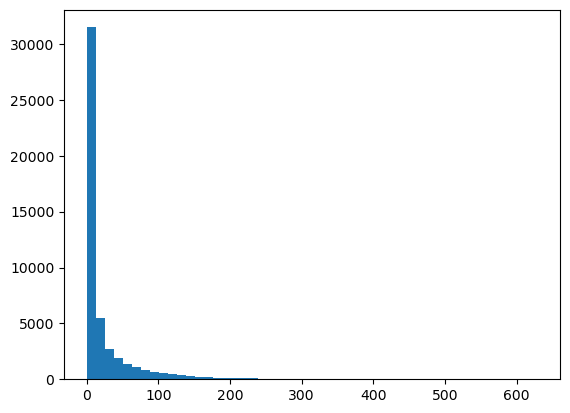

In [31]:
plt.hist(df.number_of_reviews, bins=50)
plt.show()

In [32]:
len(df[df.number_of_reviews > 300])

131

In [33]:
len(df[df.number_of_reviews > 400]) #more than 400 values are outliers

39

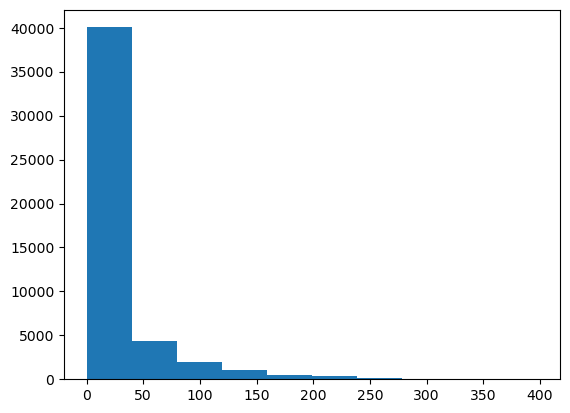

In [34]:
df = df[df.number_of_reviews <= 400]
plt.hist(df.number_of_reviews)
plt.show()

In [35]:
df[continuous].sort_values(by=['calculated_host_listings_count'])

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
24487,40.70499,-73.91304,95,3,0,0.00,1,0
28008,40.70383,-73.94431,43,2,6,0.31,1,0
28009,40.67933,-73.96912,100,1,61,3.23,1,0
28011,40.63531,-73.96546,55,2,3,0.16,1,65
28012,40.72801,-73.98736,95,1,3,0.16,1,0
...,...,...,...,...,...,...,...,...
41440,40.70651,-74.01252,203,2,9,2.16,327,336
41439,40.70583,-74.01089,221,2,4,1.97,327,333
41437,40.70731,-74.01021,242,2,15,3.75,327,261
41435,40.70785,-74.01239,505,2,7,1.79,327,275


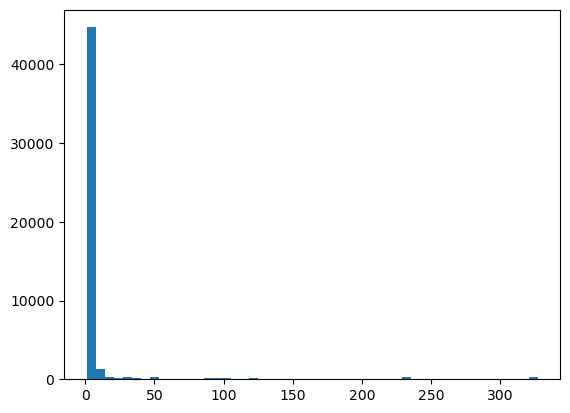

In [36]:
plt.hist(df.calculated_host_listings_count, bins=50)
plt.show()

don't have any outliers because even in more than 300 we have some datas that were shown in this plot

In [37]:
df[continuous].sort_values(by=['availability_365'])

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
24487,40.70499,-73.91304,95,3,0,0.00,1,0
28799,40.83314,-73.91708,38,2,0,0.00,1,0
14162,40.76438,-73.99482,125,1,64,1.88,1,0
14161,40.81223,-73.94313,199,4,2,0.05,1,0
28800,40.74212,-73.99042,249,4,3,0.16,1,0
...,...,...,...,...,...,...,...,...
37380,40.75565,-73.96340,330,30,0,0.00,49,365
4892,40.77902,-73.90768,100,2,2,0.03,1,365
37389,40.74319,-73.98074,39,2,1,0.16,1,365
4874,40.68448,-73.95854,175,3,4,0.07,2,365


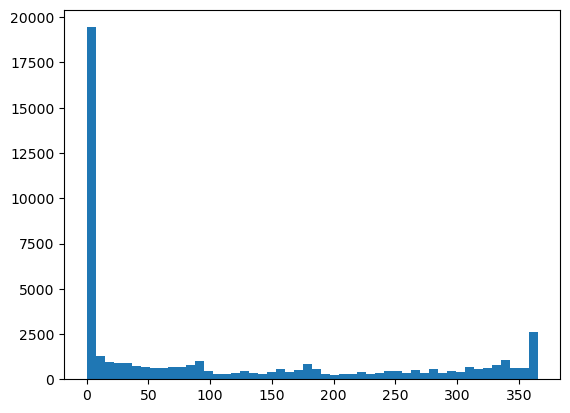

In [38]:
plt.hist(df.availability_365, bins=50)
plt.show()

This is completely compact data and it's very good feature to predict datas.

In [39]:
df.shape

(48511, 13)

<font size=3> Q. Encode Categorical Variables.

In [40]:
df[categorical]

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt
...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room
48891,Affordable room in Bushwick/East Williamsburg,Marisol,Brooklyn,Bushwick,Private room
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt
48893,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,Shared room


In [41]:
df[categorical].neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [42]:
df[categorical].room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [43]:
df["neighbourhood_group"] = df["neighbourhood_group"].map({"Brooklyn":0, "Manhattan": 1,"Queens": 3,"Staten Island": 4,"Bronx": 5})
df['room_type']=df['room_type'].map({"Private room":0,"Entire home/apt":1,"Shared room":2})

In [44]:
df[categorical]

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Clean & quiet apt home by the park,John,0,Kensington,0
1,Skylit Midtown Castle,Jennifer,1,Midtown,1
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,1,Harlem,0
3,Cozy Entire Floor of Brownstone,LisaRoxanne,0,Clinton Hill,1
4,Entire Apt: Spacious Studio/Loft by central park,Laura,1,East Harlem,1
...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,0,Bedford-Stuyvesant,0
48891,Affordable room in Bushwick/East Williamsburg,Marisol,0,Bushwick,0
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,1,Harlem,1
48893,43rd St. Time Square-cozy single bed,Taz,1,Hell's Kitchen,2


<font size=3> Q. Split the dataset into two parts (i.e. 70% train and 30% test).

In [45]:
df.shape

(48511, 13)

In [46]:
df.drop=df.drop(columns=['name','host_name','neighbourhood'],inplace=True)

In [47]:
# divide to train and test
X_train, X_test, y_train, y_test = train_test_split(df,df['price'],test_size=0.3, random_state=77)


In [48]:
X_train.shape

(33957, 10)

In [49]:
X_test.shape

(14554, 10)

In [50]:
X_train.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
27665,0,40.68635,-73.91187,0,25,1,9,0.45,2,0
27468,0,40.66705,-73.99270,0,40,5,0,0.00,1,0
1096,1,40.71746,-73.98782,0,89,5,4,0.06,1,0
3712,0,40.66296,-73.98955,1,290,2,25,0.39,1,195
38342,1,40.79844,-73.94048,1,220,5,0,0.00,1,205


<font size=3> Q. Scale the data using appropriate approach.

In [51]:
ss = StandardScaler()
ss.fit_transform(X_train)

array([[-0.81869366, -0.77844323,  0.87090919, ..., -0.40457131,
        -0.15554565, -0.85805928],
       [-0.81869366, -1.13183998, -0.8752569 , ..., -0.68784013,
        -0.18597341, -0.85805928],
       [ 0.05646785, -0.20879698, -0.76983453, ..., -0.65007096,
        -0.18597341, -0.85805928],
       ...,
       [-0.81869366, -0.68579103,  0.67540253, ..., -0.54935315,
        -0.18597341,  0.61704038],
       [ 0.05646785,  1.50453635, -0.12649881, ..., -0.68784013,
        -0.18597341, -0.85805928],
       [ 0.05646785,  0.5800285 , -1.01913252, ..., -0.68784013,
        -0.18597341, -0.77441961]])

### <font color = 'green'> **Model buidling - Linear Regression Model**

<font size=3> Q. Buid a linear regression model and evaluate the model performance.

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
model.score(X_train, y_train)

1.0

In [54]:
model_prediction=model.predict(X_train)

In [55]:
model_prediction

array([ 25.,  40.,  89., ..., 200.,  82., 150.])

In [56]:
y=X_train['price']

In [60]:
y.mean()

141.5777895573814

<font size=3> Please do play around with the data and check whether the accuracy can be increased or not. Also, do try to interpret the output and write your conclusions.

-----
### Happy Learning :)
-----